In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
eco = pd.read_csv("ecotype-OB.csv")
eco.head()

,Ecotype,Population,VegHeight,MSL_W,SB,MSD,Area,P2A2,Circularity,Nindents.Peri,IndentWidth,IndentDepth
0,Dune,D0,354,0.459259,16,4.31,613.468135,0.159502,37.157379,0.110202,5.127754,1.202011
1,Dune,D0,317,0.318421,16,4.58,321.366835,0.220129,51.482505,0.165806,4.075965,0.765863
2,Dune,D0,309,0.389542,16,5.09,438.073814,0.164009,35.246350,0.118369,6.221302,1.583950
3,Dune,D0,327,0.538593,15,4.68,447.911864,0.186158,31.049993,0.087966,7.599282,1.392852
4,Dune,D0,376,0.463811,17,4.65,406.741222,0.287131,64.196189,0.133058,4.365729,1.163325


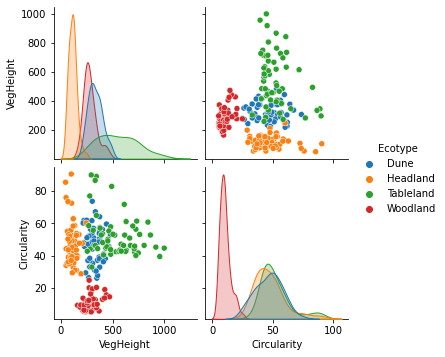

In [5]:
sns.pairplot(eco[["VegHeight","Circularity","Ecotype"]], hue ="Ecotype")

In [7]:
X = eco[["VegHeight","Circularity"]]
y = eco["Ecotype"]

In [8]:
y

0          Dune
1          Dune
2          Dune
3          Dune
4          Dune
         ...   
237    Woodland
238    Woodland
239    Woodland
240    Woodland
241    Woodland
Name: Ecotype, Length: 242, dtype: object

## Preprocessing

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

### K-nearest neighbours

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [80]:
knn_clf = KNeighborsClassifier(n_neighbors = 30)

In [81]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [82]:
predictions = knn_clf.predict(X_test)

In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        Dune       0.68      0.94      0.79        18
    Headland       1.00      0.96      0.98        25
   Tableland       0.92      0.61      0.73        18
    Woodland       1.00      1.00      1.00        19

    accuracy                           0.89        80
   macro avg       0.90      0.88      0.88        80
weighted avg       0.91      0.89      0.89        80



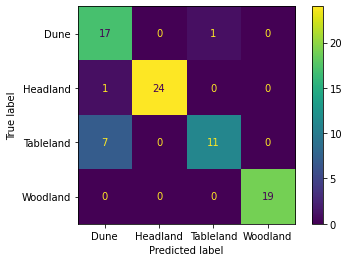

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

with k-fold cross validation

In [85]:
from sklearn.model_selection import cross_val_score, KFold

In [86]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=30), X_scaled, y,cv = KFold(n_splits=5, shuffle=True))

In [87]:
scores

array([0.89795918, 0.83673469, 0.89583333, 0.8125    , 0.9375    ])

In [88]:
round(np.mean(scores), 3)

0.876

In [89]:
round(np.std(scores), 3)

0.045

## Exploring hyperparameter space with grid_search

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
grid_search = GridSearchCV(KNeighborsClassifier(),
                          param_grid ={'n_neighbors': np.arange(1,100,1)},
                          cv = 5)

In [92]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [93]:
grid_search.best_score_

0.9071969696969697

In [94]:
grid_search.best_params_

{'n_neighbors': 5}

In [95]:
grid_search.best_estimator_

KNeighborsClassifier()

In [96]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = "rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.000552,0.000016,0.001382,0.000071,11,{'n_neighbors': 11},0.909091,0.939394,0.9375,0.87500,0.87500,0.907197,0.028396,1
4,0.000556,0.000006,0.001435,0.000084,5,{'n_neighbors': 5},0.909091,0.939394,0.9375,0.84375,0.90625,0.907197,0.034597,1
7,0.000569,0.000080,0.001424,0.000123,8,{'n_neighbors': 8},0.909091,0.939394,0.9375,0.87500,0.87500,0.907197,0.028396,1
8,0.000548,0.000007,0.001376,0.000034,9,{'n_neighbors': 9},0.909091,0.939394,0.9375,0.87500,0.87500,0.907197,0.028396,1
9,0.000572,0.000039,0.001441,0.000056,10,{'n_neighbors': 10},0.909091,0.939394,0.9375,0.87500,0.87500,0.907197,0.028396,1


In [97]:
grid_search.score(X_test, y_test)

0.85

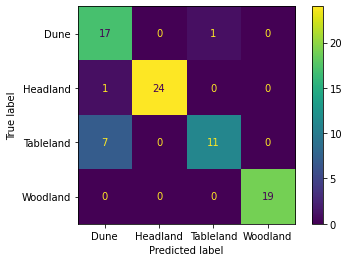

In [98]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)